<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/CNN_version3_Numpy_nivel_alto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN para clasificación de dígitos usando Numpy (nivel Alto de complejidad)

En este tercer notebook se implementará la misma red neuronal creada en [CNN con TF y Keras](https://github.com/TottiPuc/Machine_learning/blob/master/CNN_version1_TF_y_keras_nivel_bajo.ipynb) y [CNN con pytorch](https://github.com/TottiPuc/Machine_learning/blob/master/CNN_version2_Pytorch_nivel_medio.ipynb) pero esta vez sin el uso de framewors, solo se usará Numpy para hacer una clasificación de digitos del dataset MNIST

la arquitectura es:

*  una capa de entrada con 784 neurones, la cual recibira cada imágen de 28x28
*  una capa ocúlta de 128 neurones con función de activacion ReLu
*  una capa ocúlta de 64 neurones con funcion de activacion ReLu
*  una capa de salida con 10 neurones la cual definirá que dígito es el indicado para la clasificación con una funcion de activación sotfmax

In [10]:
!pip install watermark

In [0]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#impimiendo las versiones de los paquetes uasdos en este notebook
%reload_ext watermark
%watermark -a "Christian Arcos Gordillo" --iversion

pandas     1.0.3
numpy      1.18.2
sklearn    0.22.2.post1
matplotlib 3.2.1
Christian Arcos Gordillo


##Cargando los datos del dataset MNIST

Para trabajar en esta nueva red neuronal usaremos el dataset que usamos en las otras dos versiones, que puede ser descargado de la libreria sklearn. Con esta descrga el dataset ya viene todo optimizado con los datos de X_train y_train y X_test, Y_test.

In [0]:
mnist = load_digits()
X,y = mnist["data"], mnist["target"]

In [14]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
y

array([0, 1, 2, ..., 8, 9, 8])

Sin embargo en este notebook vamos a llevar a cabo un reconocimiento de digitos con el dataset MNIST pero el ofrecido por la competicion que esta siempre activa de reconocimiento de digitos de [Kaggle](https://www.kaggle.com/c/digit-recognizer/data). La diferencia radica que el conjunto de teste no trae las etiquetas para hacer la evaluacion para medir la accuracy del modelo la idea es hacer una predicción lo mas adecuada posible.

In [9]:
#importar dataset desde archivos locales
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [0]:
data_train = pd.read_csv('train.csv')

In [17]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv


In [0]:
data_test = pd.read_csv('test.csv')

In [19]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#separamos las clases de los datos de entrenamiento
range_class = np.arange(10)
y=np.asfarray(data_train.iloc[:,0])

#ajustando o dataset
train_x = data_train.iloc[:,1:].values
train_y = np.array([(range_class==label).astype(np.float) for label in y])

In [22]:
train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
train_y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [0]:
#ajustamos los datos para teste
test_x = data_test.values

In [25]:
#visualizamos los datos
y = data_train.iloc[:,0].value_counts()  # contamos cuantas calses diferentes existen en cada label
y

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


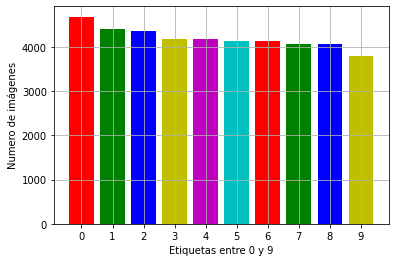

In [26]:
x=range(len(y))
plt.bar(x,y,color='rgbymc')
plt.xticks(x,x)
plt.ylabel('Numero de imágenes')
plt.xlabel('Etiquetas entre 0 y 9')
plt.grid()

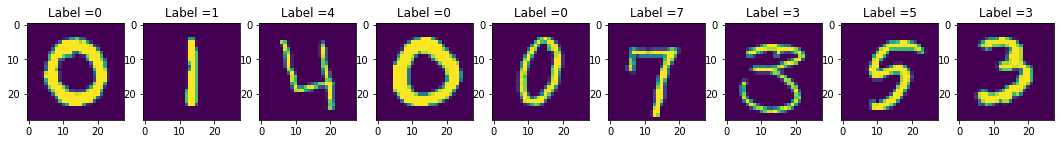

In [27]:
#creamos una figura para presentar imágenes  en filas y columnas 1x10
figure = plt.figure()

#definimos manualmente el ancho y el alto de cada imagen
figure.set_size_inches(20.5,8.5)

#Configuramos una imágen en cada figura con su respectiva etiqueta

for i in range(1,10):
  plt.subplot(1,10,i)
  label = data_train.loc[i,'label']
  pixels = data_train.iloc[i,1:].values.reshape((28,28))
  plt.title ('Label ={label}'.format(label=label))
  plt.imshow(pixels)

plt.show()

###Normalizando los datos de entrada

In [0]:
train_x = train_x / 255.
test_x = test_x /255.

In [29]:
#visualizamos el shape de los datos
shape_x = train_x.shape
shape_y = train_y.shape

# número total de registros
total = train_y.shape[0]

print("\n Las dimensiones de X son : " + str(shape_x))
print("\n Las dimensiones de Y son : " + str(shape_y))
print("\n Tenemos %d registros de entrenamiento : " % (total))


 Las dimensiones de X son : (42000, 784)

 Las dimensiones de Y son : (42000, 10)

 Tenemos 42000 registros de entrenamiento : 


##Arquitectura de la red 

Tamaño de las capas

In [0]:
def layer_size(X,Y):
  n_x = X.shape[1]
  n_h = 4                 #estos son el numero de neurones para cada capa oculta
  n_y = Y.shape[1]

  return (n_x, n_h, n_y)

Inicialización de parámetros o pesos

In [0]:
def initialise_parameters(n_x,n_h,n_y):

  np.random.seed(0)
  W1 = np.random.randn(n_h[0],n_x) *0.1
  b1 = np.zeros(shape=(n_h[0],1))
  #print(W1.shape, b1.shape)
  W2 =np.random.randn(n_h[1], n_h[0]) * 0.1
  b2 = np.zeros(shape=(n_h[1],1))
  #print(W2.shape, b2.shape)
  W3 = np.random.randn(n_y,n_h[1]) * 0.1
  b3 = np.zeros(shape=(n_y,1))
  #print(W3.shape, b3.shape)
  #verificamos si las dimensiones estan correctas
  assert(W1.shape == (n_h[0],n_x))
  assert(b1.shape == (n_h[0],1))

  assert(W2.shape == (n_h[1],n_h[0]))
  assert(b2.shape == (n_h[1],1))

  assert(W3.shape == (n_y,n_h[1]))
  assert(b3.shape == (n_y,1))

  parameters ={ "W1":W1,
               "b1" : b1,
               "W2" : W2,
               "b2" : b2,
               "W3" : W3,
               "b3" : b3
               }
  return parameters

##Función de activación

En esta ocación y para facilitar la programación de la red usaremos en todas las capas la función de activación sigmoid

In [0]:
# función de activación sigmoid
def sigmoid(X):
  return 1 /(1+np.exp(-X))

def sigmoid_derivattive(X):
  return X * (1-X)

## Creamos las funciones de optimización

##Forward Propagation
En esta sección llevaremos nuestros datos hacia adelante, osea vamos a calcular la predicción de la red segun cada pasada o epoca 

In [0]:
def forward_propagation(X,parameters):
  # agrupamos los parametros del diccionario creado de pesos
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]
  #print("forward, shape de W {} y de X {}".format(W1.shape, X.shape))
  # capa de entrada
  Z1 = (np.dot(W1,X.T) +b1).T
  #print ("primera capa shape {}".format(Z1.shape))
  #funcion de activación
  A1 = sigmoid(Z1)
  #print ( "shape de sigmoid {}".format(A1.shape))
  # capa oculta 1
  Z2 = (np.dot(W2,A1.T) + b2).T

  #funcion de activación
  A2 = sigmoid(Z2)

  #camada oculta 2
  Z3 = (np.dot(W3,A2.T)+ b3).T

  #función de activación que en el caso de ser sigmoid ya entrega las probabilidades de salida entonces la usamos para calcular las probailidades
  A3 = sigmoid(Z3)

  assert(A3.shape == (X.shape[0],10))

  cache ={
      "Z1" : Z1,
      "A1" : A1,
      "Z2" : Z2,
      "A2" : A2,
      "Z3" : Z3,
      "A3" : A3
  }

  return A3, cache


##Función de Coste
Esta sera la responsable por calcular el error del modelo recibira como parametros la salida A3 de forward_propagation y la etiqueta real del conjunto de datos

In [0]:
def compute_cost(A3,Y):

  #numero de registros de Y
  m = Y.shape[0]

  #logaritmos de las probabilidades de las predicciones
  logprobs = np.multiply(Y, np.log(A3)) + np.multiply((1-Y), np.log(1-A3))

  # calculo del coste
  cost = - np.sum(logprobs)/m

  #ajustamos el formato de los datos
  cost = float(np.squeeze(cost))

  assert(isinstance(cost, float))

  return cost

##Backward Propagation

con las predicciones hechas en la función anterior actualizamos los pesos de la red con el algoritmo backpropagation

In [0]:
def backward_propagation(parameters, cache, X,Y):

  #shape de Y
  m = Y.shape[0]

  # extraemos del cache los valores de salida de cada activación
  A1 = cache["A1"]
  A2 = cache["A2"]
  A3 = cache["A3"]

  #extraemos los parametros
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  W3 = parameters["W3"]

  #calculamos las derivadas, esto se hace en el sentido inverso al forward propagation
  dZ3 = (A3-Y)
  dW3 = (1/m) * np.dot(dZ3.T,A2)
  db3 = (1/m) * np.sum(dZ3,keepdims=True)

  dZ2 = np.multiply(np.dot(dZ3,W3), sigmoid_derivattive(A2))
  dW2 = (1/m) * np.dot(dZ2.T,A1)
  db2 = (1/m) * np.sum(dZ2,keepdims=True)

  dZ1 = np.multiply(np.dot(dZ2,W2), sigmoid_derivattive(A1))
  dW1 = (1/m) * np.dot(dZ1.T,X)
  db1 = (1/m) * np.sum(dZ1,keepdims=True)

  #Diccionario de gradientes
  grads = {
      "dW1":dW1,
      "db1":db1,
      "dW2":dW2,
      "db2":db2,
      "dW3":dW3,
      "db3":db3
  }

  return grads

##Gradiente descendiente GD
En esta etapa vamos a actualizar los coeficientes o pesos usando la bajada del gradiente

In [0]:
def update_parameters(parameters,grads,learning_rate):

  #extraemos los pesos
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]

  #extraemos los gradientes
  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]
  dW3 = grads["dW3"]
  db3 = grads["db3"]

  # ahora actualizamos los pesos multiplicando el gradiente por la tasa de aprendizaje y luego restamos el valor actual del peso
  # el gradiente define la dirección de cambios positiva o negativa
  # la tasa de aprendizaje define la magnitud, cambios mayores o menores

  W1 = W1 - (learning_rate * dW1)
  b1 = b1 - (learning_rate * db1)
  W2 = W2 - (learning_rate * dW2)
  b2 = b2 - (learning_rate * db2)
  W3 = W3 - (learning_rate * dW3)
  b3 = b3 - (learning_rate * db3)

  # nuevo diccionario de parametros con pesos actualizados

  parameters ={ "W1":W1,
               "b1" : b1,
               "W2" : W2,
               "b2" : b2,
               "W3" : W3,
               "b3" : b3
               }
  return parameters

##Predicción del modelo
Finalmente unimos todas las funciones del blue print y creamos el entrenamiento de la red

In [0]:
def predict(X,parameters):
  m=X.shape[0]

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  A3, cache = forward_propagation(X,parameters)

  return A3

##Modelo de la Red Neuronal

In [0]:
def nn_model(X,Y,n_h, learning_rate, num_iterations, print_cost = False):

  #generamos la semilla para reproduzir los mismo resultados
  np.random.seed(3)

  # Lista para el coste en cada iteracion
  cost_per_iter = []

  #tamaño de cada capa
  n_x = layer_size(X,Y)[0]
  n_y = layer_size(X,Y)[2]

  # inicialización de pesos
  parameters = initialise_parameters(n_x,n_h,n_y)

  #Loop gradiente descendiente
  for i in range(0,num_iterations):

    #Forward propagation, Inputs: "X, pesos", outputs = "A3, cache"

    A3, cache = forward_propagation(X, parameters)

    #función de coste, Inputs: "A3,Y, pesos", outputs: "coste"
    cost = compute_cost(A3,Y)

    #guardamos el coste por iteración
    cost_per_iter.append(cost)

    # hacemos backpropagation Inputs: "pesos, cache, X, Y", outputs: "grads"
    grads = backward_propagation(parameters,cache,X,Y)

    #Calculamos el gradiente descendiente, Inputs: "pesos, grads". Outputs:"pesos"
    parameters=update_parameters(parameters,grads, learning_rate)

    # imprimimos el coste cada 100 iteraciones
    if print_cost and i % 100 ==0:
      print("Coste despues de la iteración %i: %f" %(i,cost))

  # prediccion en entrenamiento
  train_prediction = (data_train.iloc[:,0].values != np.array(predict(train_x, parameters).argmax(axis = 1)).T).astype(int)

  # Predicciones en teste
  test_prediction = np.vstack((np.arange(1,28001), predict(test_x, parameters).argmax(axis = 1).T)).T
    
  # Datos para enviar a Kaggle
  data_to_submit = pd.DataFrame(test_prediction, columns = ['ImageId','Label']) 
    
  # Print
  print("Precisión en entrrenamiento: {} %".format(100 - np.mean(train_prediction) * 100))
    
    # Salida
  output = {
        "cost" : cost_per_iter[-1],
        "parameters" : parameters,
        "cost_per_iter" : cost_per_iter,
        "train_prediction" : train_prediction,
        "test_prediction" : test_prediction,
        "data_to_submit" : data_to_submit
    }
    
  return output


###Entrenamiento

In [0]:
models = {}
learning_rates = [1.1]

#Loop de entrenamiento
for i in learning_rates:

  print("Tasa de aprendizaje = " + str(i))

  models[str(i)] = nn_model(train_x,
                            train_y,
                            n_h = [400,40],
                            learning_rate = i,
                            num_iterations = 2500,
                            print_cost = True)
  
  print("el Coste es "+ str(models[str(i)]["cost"]))
  print("------------------------------------------" + "\n")


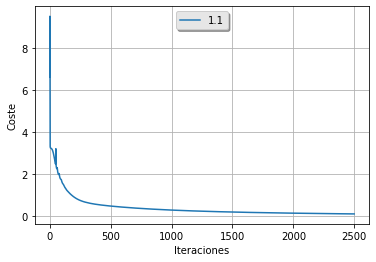

In [58]:

learning_rates = [1.1]
# grafica del coste por iteración
for i in learning_rates:
  plt.plot(np.squeeze(models[str(i)]["cost_per_iter"]), label=str(i))

# Plot
plt.ylabel('Coste')
plt.xlabel('Iteraciones')
legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.grid()
plt.show()

In [0]:
# Guardando  los resultado para submeter a Kaggle
models["1.1"]["data_to_submit"].to_csv('submit_1_1.csv', index = False)